/Users/saiboddapati/Documents/fashion recc system/venv/lib/python3.12/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


Rows in CSV      : 44,424
Missing images   : 5
Orphan filenames : 22


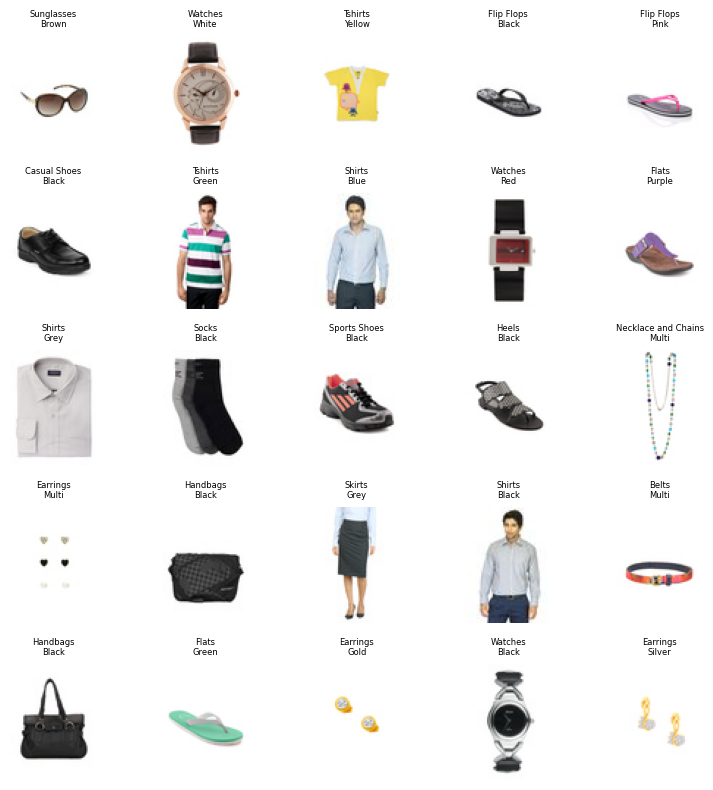

In [ ]:
# 00_data_audit.ipynb  
import pandas as pd, pathlib, cv2, matplotlib.pyplot as plt
from tqdm.auto import tqdm

DATA_DIR = pathlib.Path().resolve()      # project root
IMG_DIR  = DATA_DIR / "images"
CSV_PATH = DATA_DIR / "styles.csv"

# 1. Load metadata 
df = pd.read_csv(CSV_PATH, on_bad_lines="skip")       
df["id"] = df["id"].astype(str)                      
df["img_path"] = df["id"].str.cat([".jpg"]*len(df))  

# 2. Crheck for the presence of every image file 
available = {p.name for p in IMG_DIR.iterdir()}
df["has_img"] = df["img_path"].isin(available)

missing_imgs   = df[~df["has_img"]]
orphan_imgs    = available.difference(df["img_path"])

print(f"Rows in CSV      : {len(df):,}")
print(f"Missing images   : {len(missing_imgs):,}")
print(f"Orphan filenames : {len(orphan_imgs):,}")

# Keep only perfect matches
df_clean = df[df["has_img"]].drop(columns="has_img").reset_index(drop=True)


sample = df_clean.sample(25, random_state=42)
fig, axes = plt.subplots(5, 5, figsize=(8, 8))
for ax, (_, row) in zip(axes.flat, sample.iterrows()):
    img = cv2.imread(str(IMG_DIR / row.img_path))
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    ax.imshow(img)
    ax.set_title(f"{row.articleType}\n{row.baseColour}", fontsize=6)
    ax.axis("off")
plt.tight_layout()


df_clean.to_csv(DATA_DIR / "styles_clean.csv", index=False)
